# Assignment 5 vj222hx

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import time

Implement mse, grad_mse and grad_desc_mse form XOR assignment

In [31]:
np.random.seed(1)

def mse(ws, m, X, Y):
    N = len(X)
    err = 0.0
    for i in range(N):
        xi = X[i, :]
        yi = m(ws, xi)
        err += (Y[i] - yi) ** 2
    return err / N

def grad_mse(ws, m, grads, X, Y):
    N = len(X)
    M = len(ws)
    grad_ws = np.zeros(M)
    
    for i in range(N):
        xi = X[i, :]
        yi = Y[i]
        tmp = yi - m(ws, xi)
        for j in range(M):
            grad_ws[j] += tmp * grads[j](ws, xi)
    
    grad_ws = -2 / N * grad_ws
    return grad_ws

def grad_desc_mse(K, ws, learning_eps, loss, grad_loss):
    history = [ws]
    
    for k in range(K):
        grad_ws = grad_loss(ws)
        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws

        history.append(ws)
    
    return ws, np.array(history)

### 1.2 Setting the scene

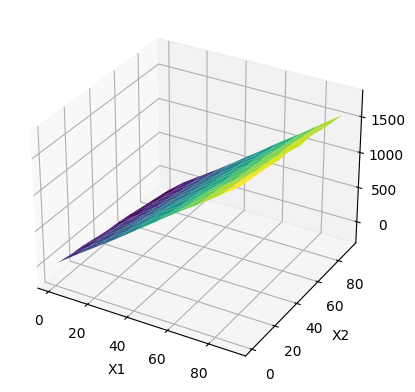

In [32]:
N = 100
XX = np.empty((N**2,2))
i = 0
for j in range(1, N+1):
    for k in range(1, N+1):
        XX[i][0] = k
        XX[i][1] = j
        i += 1

a10 = 20
a20 = -3
X1 = XX[:, 0]
X2 = XX[:, 1]

def f0(x1, x2):
    return a10 * x1 + a20 * x2

def f(x1, x2, r):
    return a10 * x1 + a20 * x2 + r

def ff(x1, x2):
    return f(x1, x2, np.random.normal(0, 10))

R = np.random.normal(0, 10, N * N)

Y = np.array([f(x1, x2, r) for x1, x2, r in zip(X1, X2, R)])

x_vals = np.arange(1, N + 1, N / 10)
y_vals = np.arange(1, N + 1, N / 10)
A, B = np.meshgrid(x_vals, y_vals)

Z = np.array([[ff(x1, x2) for x1, x2 in zip(row_A, row_B)] for row_A, row_B in zip(A, B)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

Here we are generating a plane of size NxN with some random noise

In [33]:
def m1(ws, x):
    return ws[0] * x[0] + ws[1] * x[1]

def mse1(ws):
    return mse(ws, m1, XX, Y)

in_ = 2
out = 1
limit = (6 / (in_ + out))**0.5
ws0 = np.random.rand(2) * 2 * limit - limit
print(f"initial weights: {ws0}")
print(f"Initial mse: {mse1(ws0)}")

initial weights: [1.07168949 0.96501769]
Initial mse: 882784.4918118204


Here we are defining the function for the simple neural net and initilizing random weights. 

In [34]:
def grad1(ws, x):
    return x[0]

def grad2(ws, x):
    return x[1]

gradients1 = [grad1, grad2]

Gradient descent time: 0.4290 seconds, with loss: 134.2447403613662


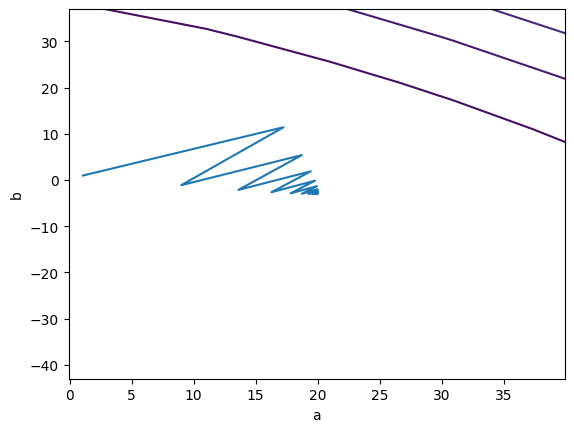

In [35]:
def f(a, b):
    return mse1([a, b])

def grad_loss(ws):
    return grad_mse(ws, m1, gradients1, XX, Y)

K = 20
learning_eps = 0.00015

start_time = time.time()
ws, history = grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss)
print(f"Gradient descent time: {time.time() - start_time:.4f} seconds, with loss: {mse1(history[-1])}")

Z = np.vectorize(f)(A, B)
plt.contour(A, B, Z, levels=30, cmap='viridis')
plt.plot(history[:, 0], history[:, 1])
plt.xlim(ws[0] - 20, ws[0] + 20)
plt.ylim(ws[1] - 40, ws[1] + 40)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

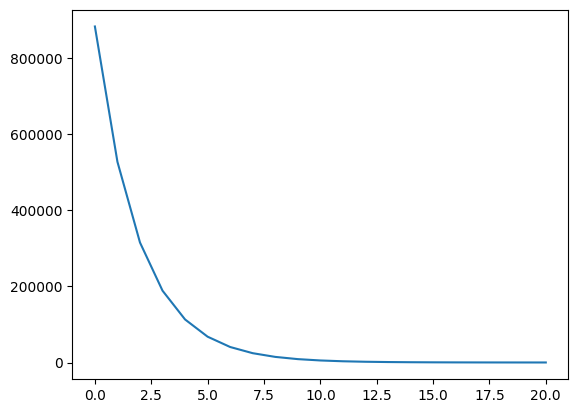

In [36]:
mseHistory = []

for i in history:
    mseHistory.append(mse1(i))

plt.plot(range(len(mseHistory)), mseHistory)
plt.show()

Here we are training the model and then plotting the descent path and the loss history

### 1.3 Stochastic Gradient Descent (SGD)

In [37]:
def stochastic_grad_desc_mse(K, ws, learning_eps, loss, grad_loss, N):
    batch_size = int(N * 0.01)
    history = [ws]

    for k in range(K):
        randices = np.random.choice(N, batch_size, replace=False)

        grad_ws = grad_loss(ws, randices)

        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws

        history.append(ws)

    return ws, np.array(history)

Here we are doing stochastic gradient descent where we are making an approximation of the gradient direction based on a sample of size "batch_size" of the dataset. 

Time elapsed: 0.0130 seconds with loss: 325.19882016133795


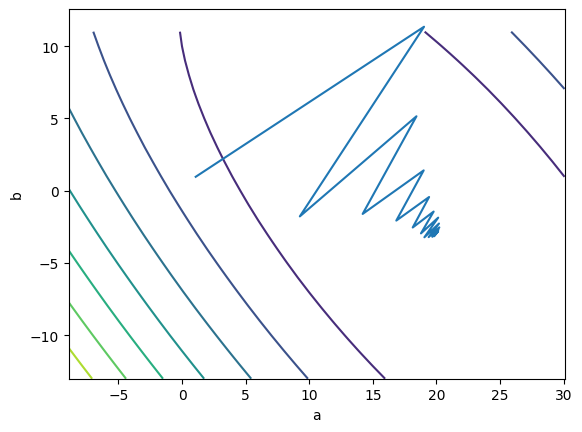

In [38]:
def grad_loss2(ws, randices):
    XX_batch = XX[randices, :]
    Y_batch = Y[randices]
    return grad_mse(ws, m1, gradients1, XX_batch, Y_batch)

a_range = np.arange(min(a10, ws0[0]) - 10, max(a10, ws0[0]) + 11, 1)
b_range = np.arange(min(a20, ws0[1]) - 10, max(a20, ws0[1]) + 11, 1)
A, B = np.meshgrid(a_range, b_range)
Z = np.vectorize(f)(A, B)

start_time = time.time()
ws, history = stochastic_grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss2, N*N)
print(f"Time elapsed: {time.time() - start_time:.4f} seconds with loss: {mse1(history[-1])}")
plt.contour(A, B, Z, cmap='viridis')
plt.plot(history[:, 0], history[:, 1])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

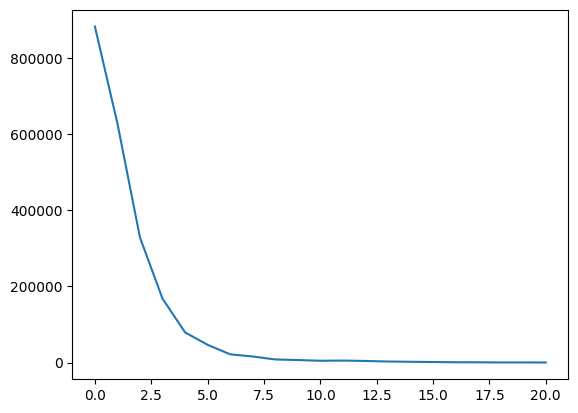

In [39]:
mseHistory = []

for i in history:
    mseHistory.append(mse1(i))

plt.plot(range(len(mseHistory)), mseHistory)
plt.show()

Here we are doing the same as before and it takes less than half the time but with a higher final loss so more iterations might have to be made for it to have the same loss

### 1.4 SGD with adaptive learning rate

Best loss: 428.8206129126933, time: 0.008985757827758789 seconds, with alpha: 0.0010 and learning rate: 0.00009


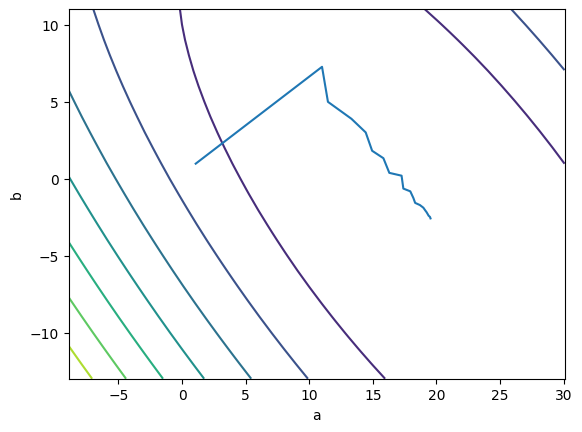

In [40]:
def stochastic_adaptive_grad_desc_mse(K, ws, learning_eps, loss, grad_loss, N, alpha):
    batch_size = int(N * 0.01)
    history = [ws]

    for k in range(K):
        randices = np.random.choice(N, batch_size, replace=False)
        grad_ws = grad_loss(ws, randices)
        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws
        learning_eps *= (1 - alpha)

        history.append(ws)

    return ws, np.array(history)

a_range = np.arange(min(a10, ws0[0]) - 10, max(a10, ws0[0]) + 11, 1)
b_range = np.arange(min(a20, ws0[1]) - 10, max(a20, ws0[1]) + 11, 1)
A, B = np.meshgrid(a_range, b_range)
Z = np.vectorize(f)(A, B)

best = [100000]
for alpha in np.arange(0.001, 0.02, 0.001):
    for learning_eps in np.arange(0.00001, 0.0001, 0.00001):
        start_time = time.time()
        ws, history = stochastic_adaptive_grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss2, N*N, alpha)
        elapsed = time.time() - start_time
        final_loss = mse1(history[-1])

        if final_loss < best[0]:
            best = [final_loss, elapsed, alpha, learning_eps, ws, history]

loss, elapsed, alpha, learning_eps, ws, history = best
print(f"Best loss: {loss}, time: {elapsed} seconds, with alpha: {alpha:.4f} and learning rate: {learning_eps:.5f}")

plt.contour(A, B, Z, cmap='viridis')
plt.plot(history[:, 0], history[:, 1])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

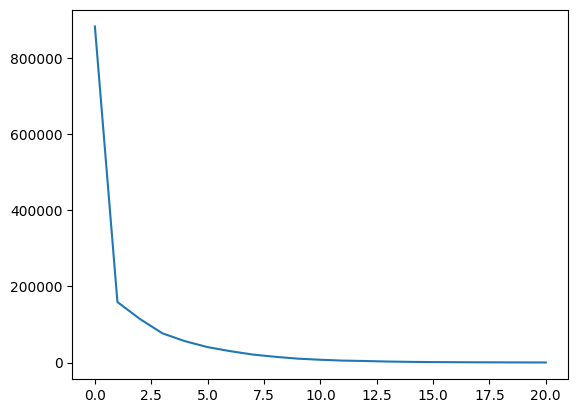

In [41]:
mseHistory = []

for i in history:
    mseHistory.append(mse1(i))

plt.plot(range(len(mseHistory)), mseHistory)
plt.show()

Here we are doing stochastic gradient descent with adaptive learning rate. The learning rate is decreasing by a factor of alpha for each iteration. This is done because we are assuming that we are getting closer to the point with each iteration thus decreasing the step size. We test different values for alpha and learning rate and with the best one we are getting a worse loss than with just SGD.

### 1.5 SGD with momentum

Best loss: 99.76541561763452, time: 0.009388923645019531 seconds, with mass: 0.00025 and learning rate: 0.00005


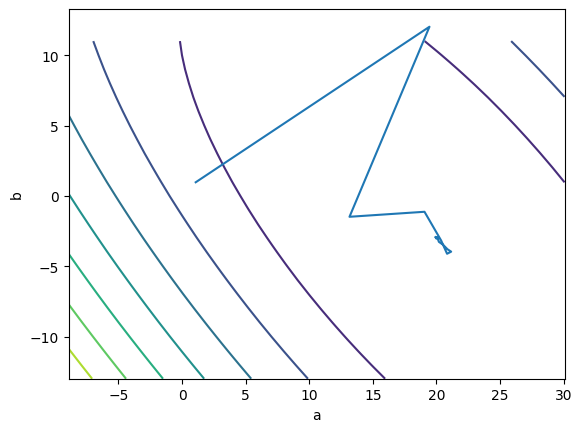

In [42]:
def stochastic_momentum_grad_desc_mse(K, ws, learning_eps, loss, grad_loss, N, mass):
    batch_size = int(N * 0.01)
    history = [ws]
    v = np.zeros_like(ws)

    for k in range(K):
        randices = np.random.choice(N, batch_size, replace=False)
        grad_ws = grad_loss(ws, randices)

        v = (v + grad_ws) / 2
        old_ws = ws.copy()
        ws = old_ws - mass * v - learning_eps * grad_ws

        history.append(ws)

    return ws, np.array(history)

a_range = np.arange(min(a10, ws0[0]) - 10, max(a10, ws0[0]) + 11, 1)
b_range = np.arange(min(a20, ws0[1]) - 10, max(a20, ws0[1]) + 11, 1)
A, B = np.meshgrid(a_range, b_range)
Z = np.vectorize(f)(A, B)

best = [100000]
for mass in np.arange(0.00001, 0.0005, 0.00001):
    for learning_eps in np.arange(0.00001, 0.0001, 0.00001):
        start_time = time.time()
        ws, history = stochastic_momentum_grad_desc_mse(K, ws0, learning_eps, mse1, grad_loss2, N*N, mass)
        elapsed = time.time() - start_time
        final_loss = mse1(history[-1])

        if final_loss < best[0]:
            best = [final_loss, elapsed, mass, learning_eps, ws, history]

loss, elapsed, mass, learning_eps, ws, history = best
print(f"Best loss: {loss}, time: {elapsed} seconds, with mass: {mass:.5f} and learning rate: {learning_eps:.5f}")

plt.contour(A, B, Z, cmap='viridis')
plt.plot(history[:, 0], history[:, 1])
plt.xlabel('a')
plt.ylabel('b')
plt.show()

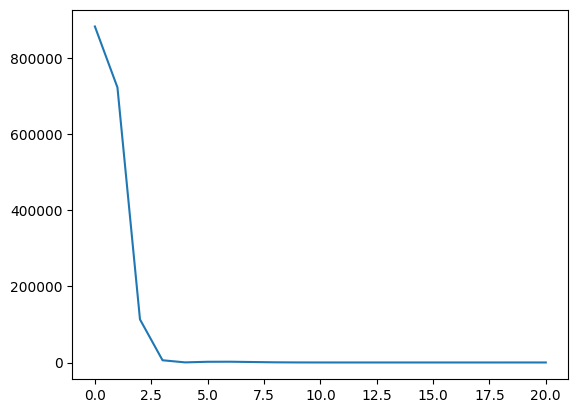

In [43]:
mseHistory = []

for i in history:
    mseHistory.append(mse1(i))

plt.plot(range(len(mseHistory)), mseHistory)
plt.show()

Here we are doing stochastic gradient descent with momentum. How far we step each time is dependent on the momentum (mass * velocity) where velocity is a function of the previous velocity and gradient. Here we get a significant decrease in loss over the prevouis best with a better time. 